In [5]:
import tweepy
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
import matplotlib.pyplot as plt

In [6]:
access_token = '410230715-3aP2U5HQQH0Q30cGhlA18LNxTWMy92uYJI4zRsiF'
access_secret = 'u08GW2qZKc6l1hIsMm6qpnigPTwePKIFa8dNjiUcOTY3c'
consumer_key = 'UYSbjVgl9cvQdiDeXUfE43zFx'
consumer_secret = 'kZxuwRznYmwwwK3qhsgkPZ9KFNN2URVZg7AtshlxCePGMeBFxP'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)

In [8]:
extractor = api
# We create a tweet list as follows:
honeywell = extractor.user_timeline(screen_name="honeywell",since = '2018-12-01',until = '2018-12-31',count = 200 ,max_id = '1079784014830030848')
synch = extractor.user_timeline(screen_name="synchrony",since = '2018-12-01',until = '2018-12-31', count=200,max_id = '1079784014830030848')
m_3 = extractor.user_timeline(screen_name="3m",since = '2018-12-01',until = '2018-12-31', count=200,max_id = '1079784014830030848')
bayer = extractor.user_timeline(screen_name="bayer",since = '2018-12-01',until = '2018-12-31', count=200,max_id = '1079784014830030848')

In [9]:
honeywell_df = pd.DataFrame(data=[tweet.text for tweet in honeywell],columns = ['Tweets'])
synch_df = pd.DataFrame(data=[tweet.text for tweet in synch],columns = ['Tweets'])
m_3_df = pd.DataFrame(data=[tweet.text for tweet in m_3],columns = ['Tweets'])
bayer_df = pd.DataFrame(data=[tweet.text for tweet in bayer],columns = ['Tweets'])

In [10]:
honeywell_df['len']  = np.array([len(tweet.text) for tweet in honeywell])
honeywell_df['ID']   = np.array([tweet.id for tweet in honeywell])
honeywell_df['Date'] = np.array([tweet.created_at for tweet in honeywell])
honeywell_df['Source'] = np.array([tweet.source for tweet in honeywell])
honeywell_df['Likes']  = np.array([tweet.favorite_count for tweet in honeywell])
honeywell_df['RTs']    = np.array([tweet.retweet_count for tweet in honeywell])

synch_df['len']  = np.array([len(tweet.text) for tweet in synch])
synch_df['ID']   = np.array([tweet.id for tweet in synch])
synch_df['Date'] = np.array([tweet.created_at for tweet in synch])
synch_df['Source'] = np.array([tweet.source for tweet in synch])
synch_df['Likes']  = np.array([tweet.favorite_count for tweet in synch])
synch_df['RTs']    = np.array([tweet.retweet_count for tweet in synch])

m_3_df['len']  = np.array([len(tweet.text) for tweet in m_3])
m_3_df['ID']   = np.array([tweet.id for tweet in m_3])
m_3_df['Date'] = np.array([tweet.created_at for tweet in m_3])
m_3_df['Source'] = np.array([tweet.source for tweet in m_3])
m_3_df['Likes']  = np.array([tweet.favorite_count for tweet in m_3])
m_3_df['RTs']    = np.array([tweet.retweet_count for tweet in m_3])

bayer_df['len']  = np.array([len(tweet.text) for tweet in bayer])
bayer_df['ID']   = np.array([tweet.id for tweet in bayer])
bayer_df['Date'] = np.array([tweet.created_at for tweet in bayer])
bayer_df['Source'] = np.array([tweet.source for tweet in bayer])
bayer_df['Likes']  = np.array([tweet.favorite_count for tweet in bayer])
bayer_df['RTs']    = np.array([tweet.retweet_count for tweet in bayer])

In [11]:
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [12]:
honeywell_df['SA'] = np.array([ analize_sentiment(tweet) for tweet in honeywell_df['Tweets'] ])
pos_tweets_h = [ tweet for index, tweet in enumerate(honeywell_df['Tweets']) if honeywell_df['SA'][index] > 0]
neu_tweets_h = [ tweet for index, tweet in enumerate(honeywell_df['Tweets']) if honeywell_df['SA'][index] == 0]
neg_tweets_h = [ tweet for index, tweet in enumerate(honeywell_df['Tweets']) if honeywell_df['SA'][index] < 0]

print("Percentage of positive tweets by Honeywell: {}%".format(len(pos_tweets_h)*100/len(honeywell_df['Tweets'])))
print("Percentage of neutral tweets by Honeywell: {}%".format(len(neu_tweets_h)*100/len(honeywell_df['Tweets'])))
print("Percentage of negative tweets by Honeywell: {}%".format(len(neg_tweets_h)*100/len(honeywell_df['Tweets'])))

Percentage of positive tweets by Honeywell: 64.0%
Percentage of neutral tweets by Honeywell: 29.0%
Percentage of negative tweets by Honeywell: 7.0%


In [13]:
synch_df['SA'] = np.array([ analize_sentiment(tweet) for tweet in synch_df['Tweets'] ])
pos_tweets_s = [ tweet for index, tweet in enumerate(synch_df['Tweets']) if synch_df['SA'][index] > 0]
neu_tweets_s = [ tweet for index, tweet in enumerate(synch_df['Tweets']) if synch_df['SA'][index] == 0]
neg_tweets_s = [ tweet for index, tweet in enumerate(synch_df['Tweets']) if synch_df['SA'][index] < 0]

print("Percentage of positive tweets by Synchrony: {}%".format(len(pos_tweets_s)*100/len(synch_df['Tweets'])))
print("Percentage of neutral tweets by Synchrony: {}%".format(len(neu_tweets_s)*100/len(synch_df['Tweets'])))
print("Percentage of negative tweets by Synchrony: {}%".format(len(neg_tweets_s)*100/len(synch_df['Tweets'])))

Percentage of positive tweets by Synchrony: 49.0%
Percentage of neutral tweets by Synchrony: 45.5%
Percentage of negative tweets by Synchrony: 5.5%


In [14]:
m_3_df['SA'] = np.array([ analize_sentiment(tweet) for tweet in m_3_df['Tweets'] ])
pos_tweets_m = [ tweet for index, tweet in enumerate(m_3_df['Tweets']) if m_3_df['SA'][index] > 0]
neu_tweets_m = [ tweet for index, tweet in enumerate(m_3_df['Tweets']) if m_3_df['SA'][index] == 0]
neg_tweets_m = [ tweet for index, tweet in enumerate(m_3_df['Tweets']) if m_3_df['SA'][index] < 0]

print("Percentage of positive tweets by 3M: {}%".format(len(pos_tweets_m)*100/len(m_3_df['Tweets'])))
print("Percentage of neutral tweets by 3M: {}%".format(len(neu_tweets_m)*100/len(m_3_df['Tweets'])))
print("Percentage of negative tweets by 3M: {}%".format(len(neg_tweets_m)*100/len(m_3_df['Tweets'])))

Percentage of positive tweets by 3M: 43.0%
Percentage of neutral tweets by 3M: 37.0%
Percentage of negative tweets by 3M: 20.0%


In [15]:
bayer_df['SA'] = np.array([ analize_sentiment(tweet) for tweet in bayer_df['Tweets'] ])
pos_tweets_b = [ tweet for index, tweet in enumerate(bayer_df['Tweets']) if bayer_df['SA'][index] > 0]
neu_tweets_b = [ tweet for index, tweet in enumerate(bayer_df['Tweets']) if bayer_df['SA'][index] == 0]
neg_tweets_b = [ tweet for index, tweet in enumerate(bayer_df['Tweets']) if bayer_df['SA'][index] < 0]

print("Percentage of positive tweets by bayer: {}%".format(len(pos_tweets_b)*100/len(bayer_df['Tweets'])))
print("Percentage of neutral tweets by bayer: {}%".format(len(neu_tweets_b)*100/len(bayer_df['Tweets'])))
print("Percentage de negative tweets by bayer: {}%".format(len(neg_tweets_b)*100/len(bayer_df['Tweets'])))

Percentage of positive tweets by bayer: 27.5%
Percentage of neutral tweets by bayer: 69.0%
Percentage de negative tweets by bayer: 3.5%


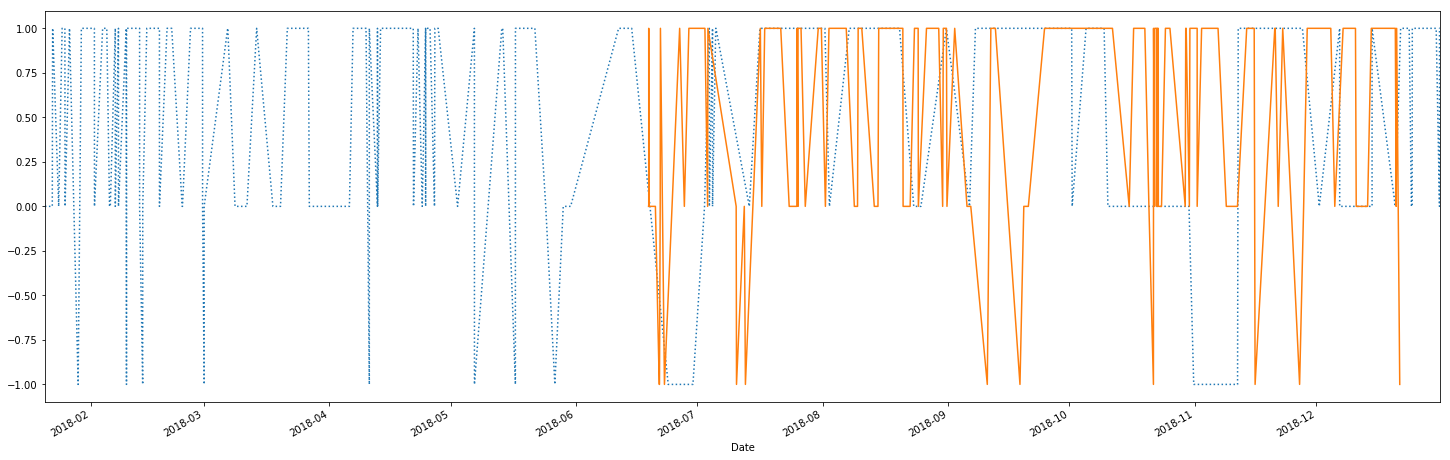

In [16]:
h_t = pd.Series(data = honeywell_df['SA'].values,index = honeywell_df['Date'])
s_t = pd.Series(data = synch_df['SA'].values,index = synch_df['Date'])
m_t = pd.Series(data = m_3_df['SA'].values,index = m_3_df['Date'])
b_t = pd.Series(data = bayer_df['SA'].values,index = bayer_df['Date'])
#ax,fig = plt.subplots(figsize=(16,4))
h_t.plot(figsize=(25,8),linestyle = ':')
s_t.plot(figsize=(25,8),linestyle = '-')
plt.show()

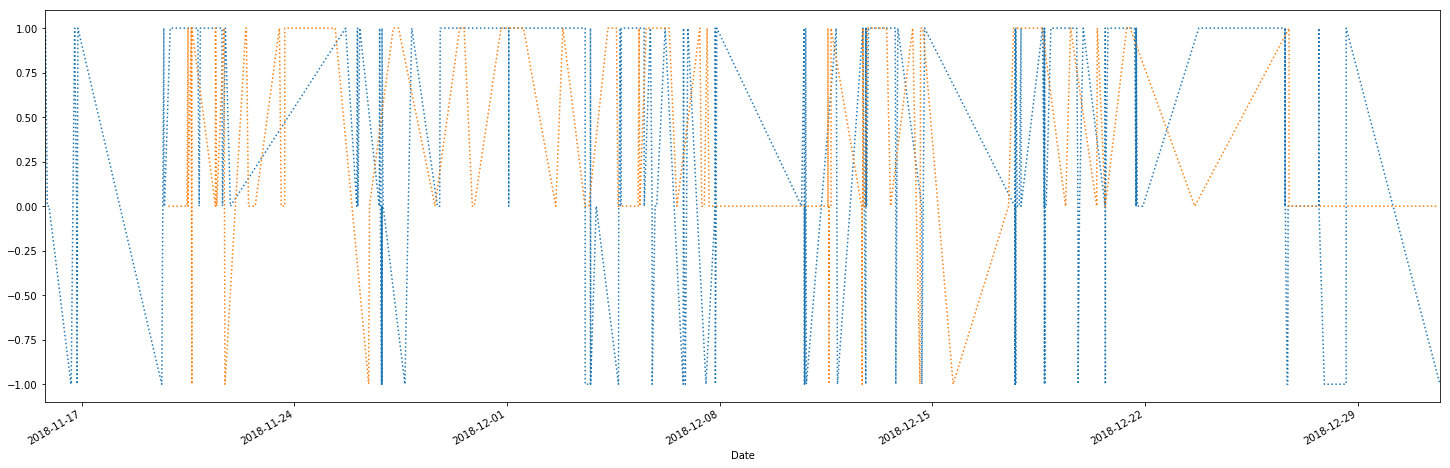

In [17]:
m_t.plot(figsize=(25,8),linestyle = ':')
b_t.plot(figsize=(25,8),linestyle = ':')
plt.show()

In [18]:
dict(honeywell_df['SA'].value_counts())

{-1: 14, 0: 58, 1: 128}

## Incorporating NLP into Stock Selection

In [40]:
all_df = [bayer_df, honeywell_df,m_3_df,synch_df]
df_labels = ['Honeywell','Synchrony Financial', '3M', 'Bayer']
mod_df=[]

#making the dfs date match that of the stock data
for df in all_df:
    df2=df.copy()
    df2['Date']=df2.Date.map(lambda x: x.strftime('%Y-%m-%d'))
    df2['Date']=pd.to_datetime(df2['Date'])
    mod_df.append(df2)

C:\Users\tnuta\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\tnuta\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


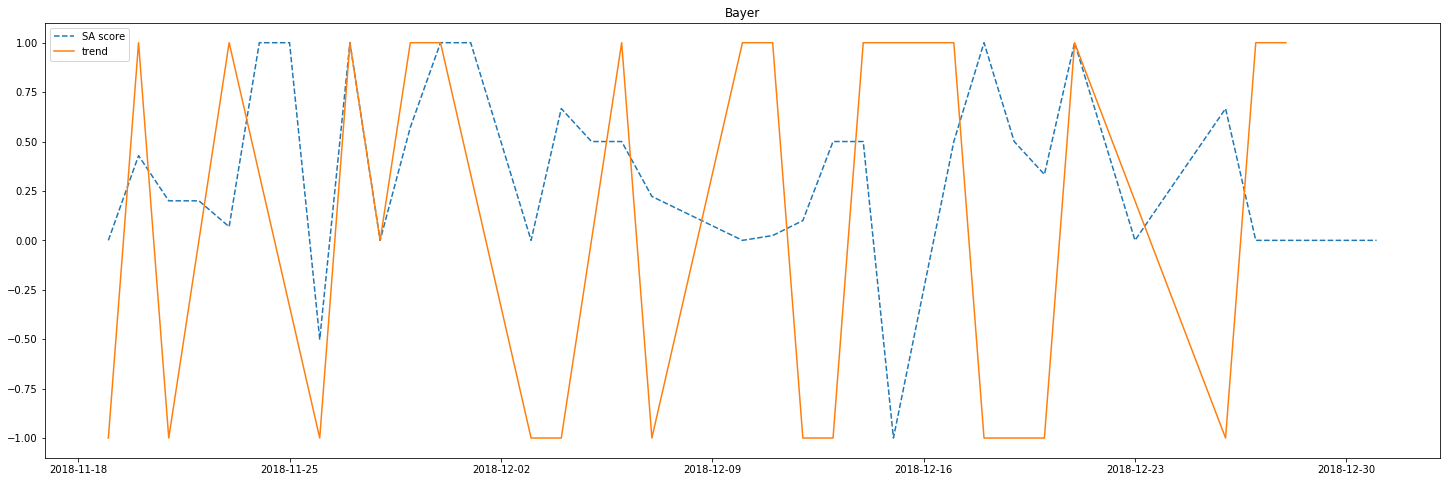

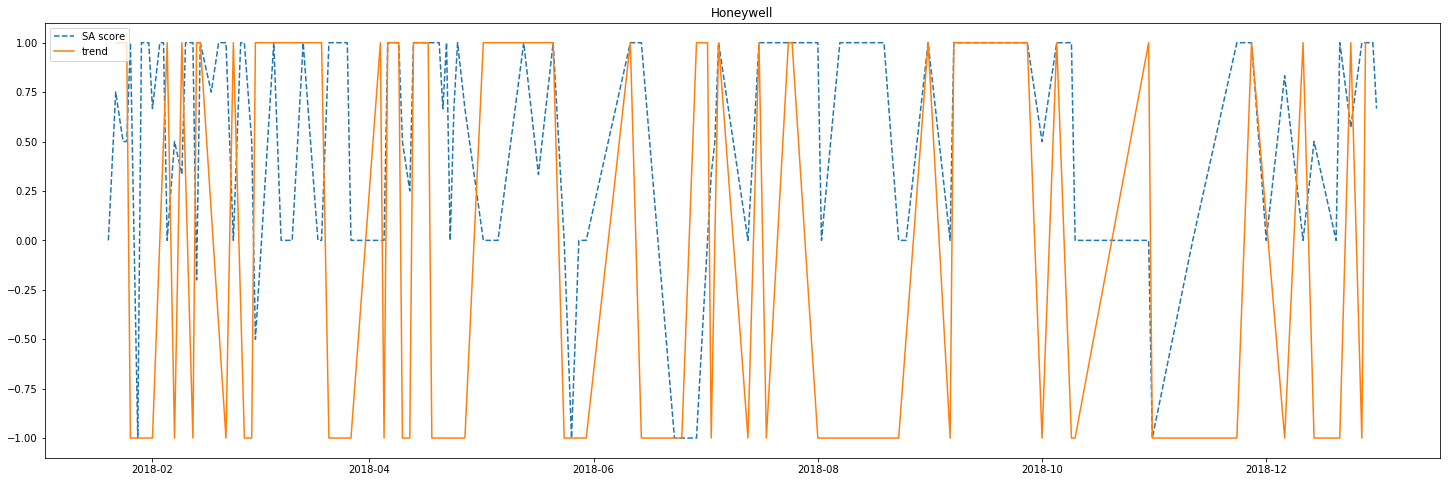

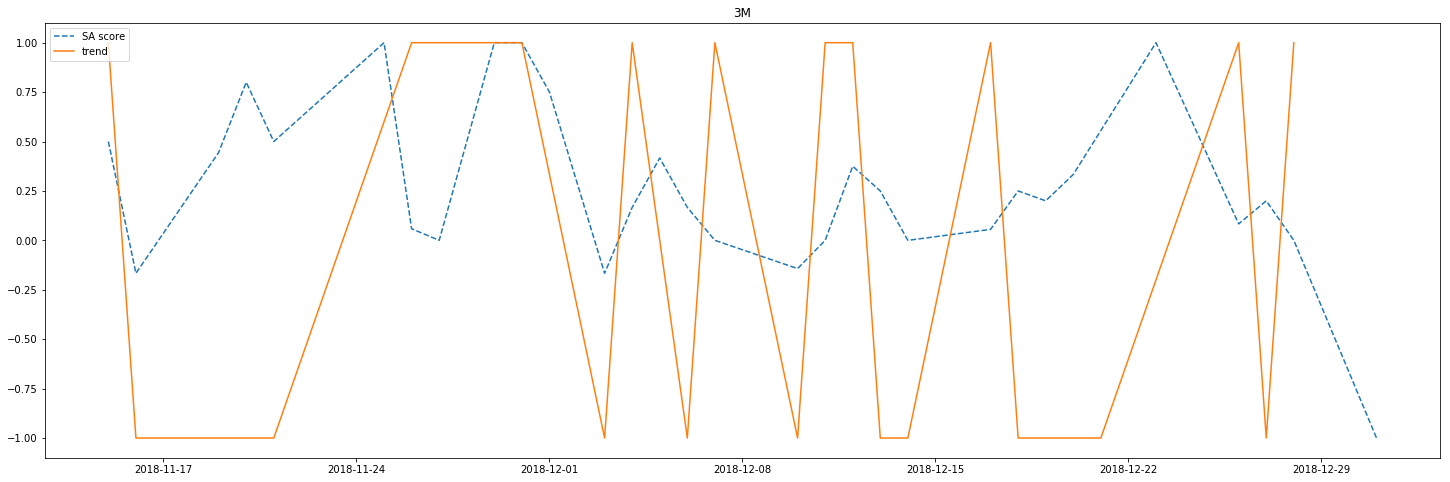

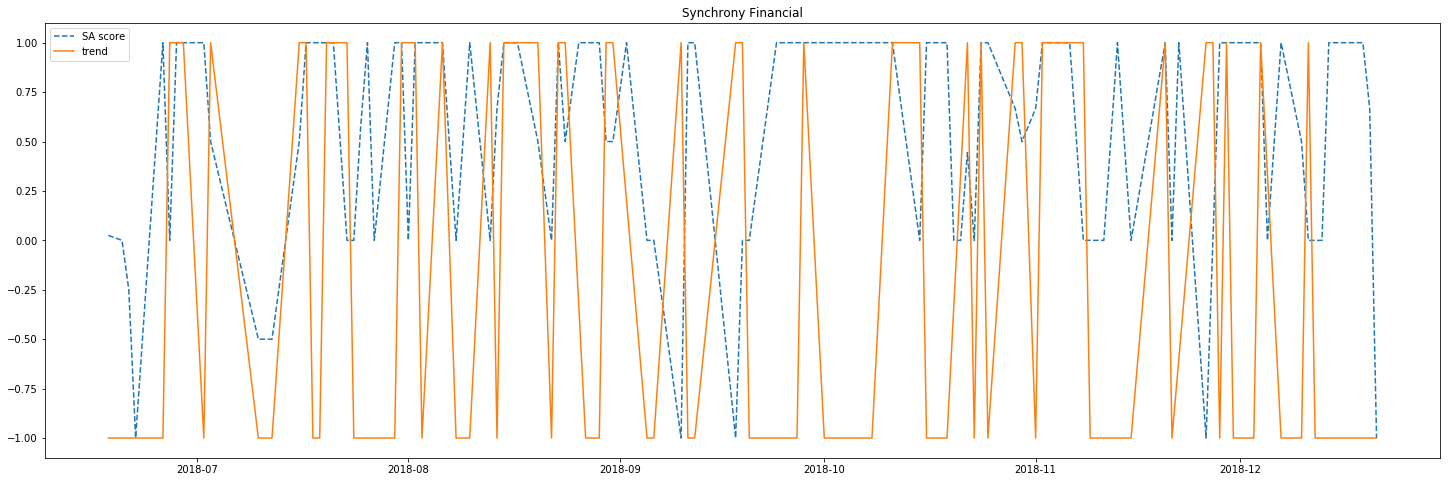